<a href="https://colab.research.google.com/github/kishan75/pandaLearningAssignment/blob/main/panda_sassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing covid-19 data from csv file (september 2019 - august 2020)

In [ ]:
import pandas as pd


data = pd.read_csv("covid_19_india.csv", parse_dates=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


Extracting month from date

In [ ]:
import datetime
import calendar

def get_month(val):
    return calendar.month_abbr[datetime.datetime.strptime(val, "%Y-%m-%d").month]

data['Date'] = data['Date'].apply(get_month)


printing all state/union territory name

In [ ]:
data['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
       'Maharashtra***'], dtype=object)

selecting state to show data 

In [ ]:
selected_state=input("select state or union territory")

select state or union territoryMadhya Pradesh


here we are firstly fetching data of given state then ,
grouping on basis of month, then selecting last report of that month,
then sorting on basis of serial number (before it was sorted on month)

In [ ]:
plotting_data=data[data['State/UnionTerritory']==selected_state].groupby(by='Date',as_index = False).max().sort_values(by = 'Sno')
print(plotting_data)

   Date    Sno     Time  ...   Cured Deaths Confirmed
11  Sep   6825  8:00 AM  ...  102445   2281    126043
10  Oct   7910  8:00 AM  ...  158455   2941    170690
9   Nov   8960  8:00 AM  ...  186521   3250    204745
2   Dec  10066  8:00 AM  ...  227965   3595    240947
4   Jan  11182  8:00 AM  ...  248319   3807    254886
3   Feb  12190  8:00 AM  ...  254874   3863    261403
7   Mar  13306  9:30 PM  ...  273168   3977    293179
0   Apr  14386  8:00 AM  ...  453331   5519    550927
8   May  15502  8:00 AM  ...  743550   8019    778825
6   Jun  16582  8:00 AM  ...  780187   8954    789771
5   Jul  17698  8:00 AM  ...  781172  10513    791806
1   Aug  18094  8:00 AM  ...  781330  10514    791980

[12 rows x 9 columns]


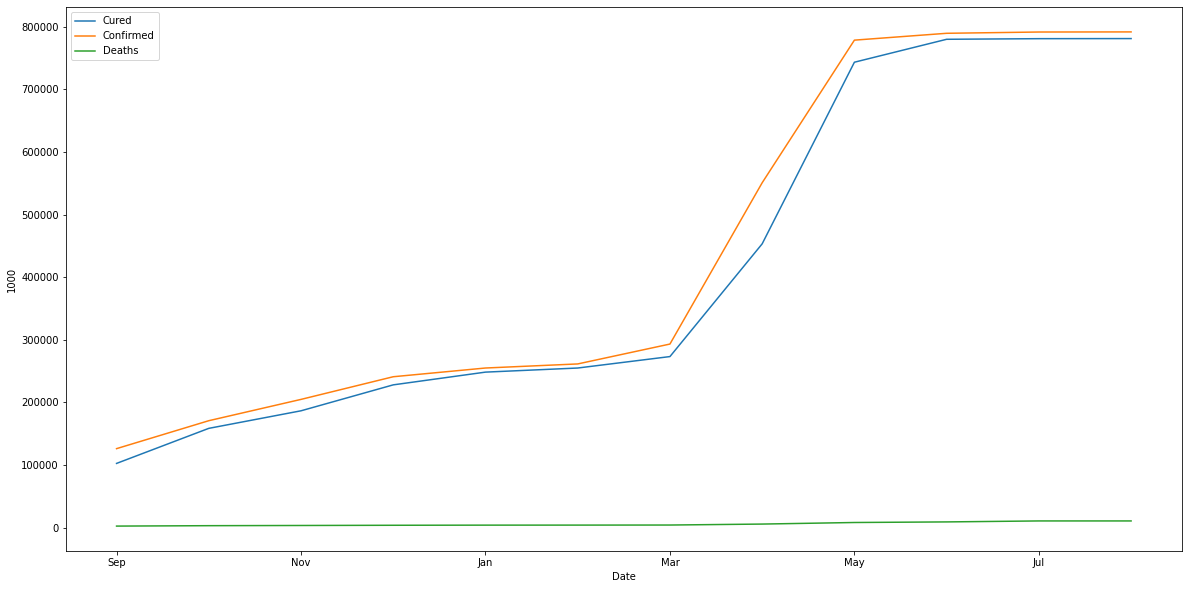

In [ ]:
import matplotlib.pyplot as plt
fig, axe = plt.subplots(figsize=(20, 10))
axe.set_ylabel('1000')
plotting_data.plot.line(x="Date",y=["Cured","Confirmed","Deaths"],ax=axe);